In [33]:
import pandas as pd
import numpy as np


In [34]:
data  = pd.read_csv('./data/Customer_Sentiment.csv')
data.head()

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no


In [35]:
data.drop(labels=['customer_id', 'review_text', 'purchase_channel', 'platform'], axis=1, inplace=True)
data.head()

,gender,age_group,region,product_category,customer_rating,sentiment,response_time_hours,issue_resolved,complaint_registered
0,male,60+,north,automobile,1,negative,46,yes,yes
1,other,46-60,central,books,5,positive,5,yes,no
2,female,36-45,east,sports,1,negative,38,yes,yes
3,female,18-25,central,groceries,2,negative,16,yes,yes
4,female,18-25,east,electronics,3,neutral,15,yes,no


In [36]:
print(data['age_group'].value_counts(normalize=True))
print(data['product_category'].value_counts(normalize=True))
print(data['customer_rating'].value_counts(normalize=True))
print(data['sentiment'].value_counts(normalize=True))
print(data['issue_resolved'].value_counts(normalize=True))
print(data['complaint_registered'].value_counts(normalize=True))

age_group
46-60    0.20236
60+      0.20196
18-25    0.19960
26-35    0.19824
36-45    0.19784
Name: proportion, dtype: float64
product_category
groceries         0.11432
automobile        0.11332
books             0.11248
travel            0.11244
fashion           0.11128
sports            0.11052
home & kitchen    0.10904
electronics       0.10900
beauty            0.10760
Name: proportion, dtype: float64
customer_rating
3    0.20340
4    0.20264
2    0.20184
5    0.19648
1    0.19564
Name: proportion, dtype: float64
sentiment
positive    0.39912
negative    0.39748
neutral     0.20340
Name: proportion, dtype: float64
issue_resolved
yes    0.66372
no     0.33628
Name: proportion, dtype: float64
complaint_registered
no     0.60252
yes    0.39748
Name: proportion, dtype: float64


In [37]:
# Perform label encoding on gender issue_resolved and complaint_registered
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

order1 = ['no', 'yes']
order2 = ['negative', 'neutral', 'positive']
order3 = ['18-25', '26-35', '36-45', '46-60', '60+']

enc = OrdinalEncoder(categories=[order1, order1, order2, order3])

data[['complaint_registered', 'issue_resolved', 'sentiment', 'age_group']] = enc.fit_transform(data[['complaint_registered', 'issue_resolved', 'sentiment', 'age_group']])

print(data.head())

   gender  age_group   region product_category  customer_rating  sentiment  \
0    male        4.0    north       automobile                1        0.0   
1   other        3.0  central            books                5        2.0   
2  female        2.0     east           sports                1        0.0   
3  female        0.0  central        groceries                2        0.0   
4  female        0.0     east      electronics                3        1.0   

   response_time_hours  issue_resolved  complaint_registered  
0                   46             1.0                   1.0  
1                    5             1.0                   0.0  
2                   38             1.0                   1.0  
3                   16             1.0                   1.0  
4                   15             1.0                   0.0  


In [39]:
data = pd.concat([data.drop('region', axis=1), pd.get_dummies(data['region'], prefix='region', dtype=float)], axis=1)
print(data.head())

   gender  age_group product_category  customer_rating  sentiment  \
0    male        4.0       automobile                1        0.0   
1   other        3.0            books                5        2.0   
2  female        2.0           sports                1        0.0   
3  female        0.0        groceries                2        0.0   
4  female        0.0      electronics                3        1.0   

   response_time_hours  issue_resolved  complaint_registered  region_central  \
0                   46             1.0                   1.0             0.0   
1                    5             1.0                   0.0             1.0   
2                   38             1.0                   1.0             0.0   
3                   16             1.0                   1.0             1.0   
4                   15             1.0                   0.0             0.0   

   region_east  region_north  region_south  region_west  
0          0.0           1.0           0.0    

In [40]:
data = pd.concat([data.drop('product_category', axis=1), pd.get_dummies(data['product_category'], prefix='product_category', dtype=float)], axis=1)
print(data.head())

   gender  age_group  customer_rating  sentiment  response_time_hours  \
0    male        4.0                1        0.0                   46   
1   other        3.0                5        2.0                    5   
2  female        2.0                1        0.0                   38   
3  female        0.0                2        0.0                   16   
4  female        0.0                3        1.0                   15   

   issue_resolved  complaint_registered  region_central  region_east  \
0             1.0                   1.0             0.0          0.0   
1             1.0                   0.0             1.0          0.0   
2             1.0                   1.0             0.0          1.0   
3             1.0                   1.0             1.0          0.0   
4             1.0                   0.0             0.0          1.0   

   region_north  ...  region_west  product_category_automobile  \
0           1.0  ...          0.0                          1.0

In [41]:
data = pd.concat([data.drop('gender', axis=1), pd.get_dummies(data['gender'], prefix='gender', dtype=float)], axis=1)
print(data.head())

   age_group  customer_rating  sentiment  response_time_hours  issue_resolved  \
0        4.0                1        0.0                   46             1.0   
1        3.0                5        2.0                    5             1.0   
2        2.0                1        0.0                   38             1.0   
3        0.0                2        0.0                   16             1.0   
4        0.0                3        1.0                   15             1.0   

   complaint_registered  region_central  region_east  region_north  \
0                   1.0             0.0          0.0           1.0   
1                   0.0             1.0          0.0           0.0   
2                   1.0             0.0          1.0           0.0   
3                   1.0             1.0          0.0           0.0   
4                   0.0             0.0          1.0           0.0   

   region_south  ...  product_category_books  product_category_electronics  \
0           0.

<Axes: >

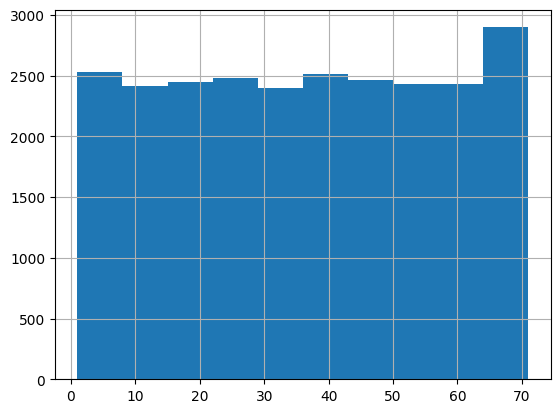

In [42]:
data['response_time_hours'].hist()

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['response_time_hours']] = scaler.fit_transform(data[['response_time_hours']])
print(data.head())

   age_group  customer_rating  sentiment  response_time_hours  issue_resolved  \
0        4.0                1        0.0             0.484355             1.0   
1        3.0                5        2.0            -1.506175             1.0   
2        2.0                1        0.0             0.095959             1.0   
3        0.0                2        0.0            -0.972130             1.0   
4        0.0                3        1.0            -1.020680             1.0   

   complaint_registered  region_central  region_east  region_north  \
0                   1.0             0.0          0.0           1.0   
1                   0.0             1.0          0.0           0.0   
2                   1.0             0.0          1.0           0.0   
3                   1.0             1.0          0.0           0.0   
4                   0.0             0.0          1.0           0.0   

   region_south  ...  product_category_books  product_category_electronics  \
0           0.

In [45]:
print(data.head())

   age_group  customer_rating  sentiment  response_time_hours  issue_resolved  \
0        4.0                1        0.0             0.484355             1.0   
1        3.0                5        2.0            -1.506175             1.0   
2        2.0                1        0.0             0.095959             1.0   
3        0.0                2        0.0            -0.972130             1.0   
4        0.0                3        1.0            -1.020680             1.0   

   complaint_registered  region_central  region_east  region_north  \
0                   1.0             0.0          0.0           1.0   
1                   0.0             1.0          0.0           0.0   
2                   1.0             0.0          1.0           0.0   
3                   1.0             1.0          0.0           0.0   
4                   0.0             0.0          1.0           0.0   

   region_south  ...  product_category_books  product_category_electronics  \
0           0.

In [46]:
data.to_csv("./data/Customer_Sentiment_Processed.csv")